In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [42]:
train_csv = pd.read_csv('train.csv')
final_csv = pd.read_csv('test.csv')

In [43]:
train_csv.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare',
       'label'],
      dtype='object')

In [44]:
def show_null_count(csv):
    idx = csv.isnull().sum()
    idx = idx[idx>0]
    idx.sort_values(inplace=True)
    idx.plot.bar()

In [45]:
# def get_corr(col, csv):
#     corr = csv.corr()[col]
#     idx_gt0 = corr[corr>0].sort_values(ascending=False).index.tolist()
#     return corr[idx_gt0]


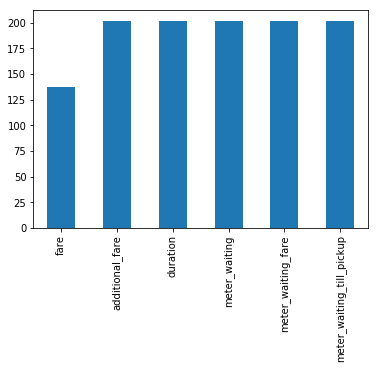

In [46]:
show_null_count(train_csv)

In [47]:
# sns.heatmap(train_csv.corr(), vmax=.8, square=True)

In [48]:

# sns.pairplot(train_csv[['fare']].dropna())
# train_csv['fare'].value_counts()


In [49]:
train_csv.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,1.717600e+04,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,2.014549e+08,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,7.456830e+06,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,1.947619e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,2.013582e+08,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,2.083081e+08,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,2.138173e+08,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [50]:
# print(get_corr('additional_fare', train_csv))


In [51]:
# upper_lim = train_csv['additional_fare'].quantile(.95)
# lower_lim = train_csv['additional_fare'].quantile(.05)
# train_csv = train_csv[(train_csv['additional_fare'] < upper_lim) & (train_csv['additional_fare'] > lower_lim)]

# upper_lim = train_csv['duration'].quantile(.95)
# lower_lim = train_csv['duration'].quantile(.05)
# train_csv = train_csv[(train_csv['duration'] < upper_lim) & (train_csv['duration'] > lower_lim)]

# upper_lim = train_csv['meter_waiting'].quantile(.95)
# lower_lim = train_csv['meter_waiting'].quantile(.05)
# train_csv = train_csv[(train_csv['meter_waiting'] < upper_lim) & (train_csv['meter_waiting'] > lower_lim)]

# upper_lim = train_csv['meter_waiting_fare'].quantile(.95)
# lower_lim = train_csv['meter_waiting_fare'].quantile(.05)
# train_csv = train_csv[(train_csv['meter_waiting_fare'] < upper_lim) & (train_csv['meter_waiting_fare'] > lower_lim)]

# upper_lim = train_csv['meter_waiting_till_pickup'].quantile(.95)
# lower_lim = train_csv['meter_waiting_till_pickup'].quantile(.05)
# train_csv = train_csv[(train_csv['meter_waiting_till_pickup'] < upper_lim) & (train_csv['meter_waiting_till_pickup'] > lower_lim)]

# upper_lim = train_csv['pick_lat'].quantile(.95)
# lower_lim = train_csv['pick_lat'].quantile(.05)
# train_csv = train_csv[(train_csv['pick_lat'] < upper_lim) & (train_csv['pick_lat'] > lower_lim)]

# upper_lim = train_csv['pick_lon'].quantile(.95)
# lower_lim = train_csv['pick_lon'].quantile(.05)
# train_csv = train_csv[(train_csv['pick_lon'] < upper_lim) & (train_csv['pick_lon'] > lower_lim)]

# upper_lim = train_csv['drop_lat'].quantile(.95)
# lower_lim = train_csv['drop_lat'].quantile(.05)
# train_csv = train_csv[(train_csv['drop_lat'] < upper_lim) & (train_csv['drop_lat'] > lower_lim)]

# upper_lim = train_csv['drop_lon'].quantile(.95)
# lower_lim = train_csv['drop_lon'].quantile(.05)
# train_csv = train_csv[(train_csv['drop_lon'] < upper_lim) & (train_csv['drop_lon'] > lower_lim)]

# upper_lim = train_csv['fare'].quantile(.95)
# lower_lim = train_csv['fare'].quantile(.05)
# train_csv = train_csv[(train_csv['fare'] < upper_lim) & (train_csv['fare'] > lower_lim)]


In [52]:
from datetime import datetime
def find_time(csv):
    t2_data=csv['drop_time']
    t1_data=csv['pickup_time']
    data=[]
    for i in range(0,len(t2_data)):
        t2=datetime.strptime(t2_data[i],'%m/%d/%Y %H:%M')
        t1=datetime.strptime(t1_data[i],'%m/%d/%Y %H:%M')
        tdelta = (t2 - t1).total_seconds()
        data.append(float(tdelta))     
    csv['time']=data
find_time(train_csv)

In [53]:
train_csv['label']=train_csv['label'].replace('incorrect',int(0))

In [54]:
train_csv['label']=train_csv['label'].replace('correct',int(1))

In [55]:
print(train_csv.head(n=5))

      tripid  additional_fare  duration  meter_waiting  meter_waiting_fare  \
0  189123628             10.5     834.0           56.0              0.0000   
1  189125358             10.5     791.0           47.0              0.0000   
2  189125719             10.5    1087.0           80.0              0.0000   
3  189127273             10.5     598.0          271.0             15.6638   
4  189128020              NaN       NaN            NaN                 NaN   

   meter_waiting_till_pickup     pickup_time       drop_time  pick_lat  \
0                       64.0  11/1/2019 0:20  11/1/2019 0:34   6.86252   
1                      134.0  11/1/2019 0:56  11/1/2019 1:09   6.88589   
2                       61.0  11/1/2019 1:08  11/1/2019 1:26   6.90839   
3                       68.0  11/1/2019 2:27  11/1/2019 2:37   6.92570   
4                        NaN  11/1/2019 3:34  11/1/2019 3:51   6.87441   

   pick_lon  drop_lat  drop_lon    fare  label    time  
0   79.8993   6.90330   79.87

In [56]:
# train_csv.dropna(axis = 0, how ='any',inplace=True)
# train_csv.reset_index(drop=True,inplace=True)
train_csv.isnull().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
time                           0
dtype: int64

In [57]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train_csv[['additional_fare']])
train_csv[['additional_fare']]=imp.transform(train_csv[['additional_fare']])

imp.fit(train_csv[['duration']])
train_csv[['duration']]=imp.transform(train_csv[['duration']])

# imp.fit(train_csv[['meter_waiting']])
# train_csv[['meter_waiting']]=imp.transform(train_csv[['meter_waiting']])

# imp.fit(train_csv[['meter_waiting_fare']])
# train_csv[['meter_waiting_fare']]=imp.transform(train_csv[['meter_waiting_fare']])

# imp.fit(train_csv[['meter_waiting_till_pickup']])
# train_csv[['meter_waiting_till_pickup']]=imp.transform(train_csv[['meter_waiting_till_pickup']])

imp.fit(train_csv[['fare']])
train_csv[['fare']]=imp.transform(train_csv[['fare']])

In [58]:
print(train_csv.head(n=5))

      tripid  additional_fare     duration  meter_waiting  meter_waiting_fare  \
0  189123628        10.500000   834.000000           56.0              0.0000   
1  189125358        10.500000   791.000000           47.0              0.0000   
2  189125719        10.500000  1087.000000           80.0              0.0000   
3  189127273        10.500000   598.000000          271.0             15.6638   
4  189128020        13.719651  1702.858077            NaN                 NaN   

   meter_waiting_till_pickup     pickup_time       drop_time  pick_lat  \
0                       64.0  11/1/2019 0:20  11/1/2019 0:34   6.86252   
1                      134.0  11/1/2019 0:56  11/1/2019 1:09   6.88589   
2                       61.0  11/1/2019 1:08  11/1/2019 1:26   6.90839   
3                       68.0  11/1/2019 2:27  11/1/2019 2:37   6.92570   
4                        NaN  11/1/2019 3:34  11/1/2019 3:51   6.87441   

   pick_lon  drop_lat  drop_lon    fare  label    time  
0   79.8993

In [59]:
train_csv['additional_fare'].unique()


array([1.05000000e+01, 1.37196506e+01, 5.00000000e+00, 6.05000000e+01,
       4.05000000e+01, 3.50000000e+01, 0.00000000e+00, 5.50000000e+01,
       1.10500000e+02, 1.11000000e+02, 2.10000000e+01, 2.05000000e+01,
       7.05000000e+01, 1.10000000e+01, 8.05000000e+01, 7.50000000e+01,
       1.05000000e+02, 2.21000000e+02, 8.10000000e+01, 4.50820000e+02,
       1.00000000e+01, 2.10500000e+02, 3.05000000e+01, 2.50000000e+01,
       1.27950300e+04, 9.15000000e+01, 8.55000000e+01, 8.00000000e+01,
       6.10000000e+01])

In [60]:
train_csv.isnull().sum()

tripid                         0
additional_fare                0
duration                       0
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                           0
label                          0
time                           0
dtype: int64

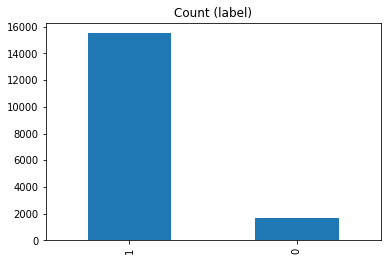

In [100]:
train_csv.label.value_counts().plot(kind='bar', title='Count (label)');

In [105]:
# from sklearn.datasets import make_classification
# X, y = make_classification(
#     n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
#     n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1,
#     n_samples=100, random_state=10
# )


In [106]:
# def plot_2d_space(X, y, label='Classes'):   
#     colors = ['#1F77B4', '#FF7F0E']
#     markers = ['o', 's']
#     for l, c, m in zip(np.unique(y), colors, markers):
#         plt.scatter(
#             X[y==l, 0],
#             X[y==l, 1],
#             c=c, label=l, marker=m
#         )
#     plt.title(label)
#     plt.legend(loc='upper right')
#     plt.show()

In [107]:
# from sklearn.decomposition import PCA

# # pca = PCA(n_components=2)
# # labels = ['Class 0', 'Class 1']
# X = train_csv['tripid']
# y=train_csv['fare']
# plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [96]:
# train_csv['additional_fare_bin'] = pd.cut(train_csv['additional_fare'], bins=[0,6,11,31,61,int(max(train_csv['additional_fare'] ))+1], labels=['v_l','l','m','h','v_h'])

In [62]:
# train_csv['additional_fare_bin'].unique()

In [63]:
# train_csv.dropna(axis = 0, how ='any',inplace=True)
# train_csv.reset_index(drop=True,inplace=True)
# train_csv.isnull().sum()

In [64]:
import math
def find_distance(csv):
    lat1=csv['pick_lat']
    lat2=csv['drop_lat']
    lon1=csv['pick_lon']
    lon2=csv['drop_lon']
    distance=[]
    R = 6373.0
    for i in range(0,len(lat1)):
        la1=math.radians(lat1[i])
        lo1=math.radians(lon1[i])
        la2=math.radians(lat2[i])
        lo2=math.radians(lon2[i])
        dlo=lo2-lo1
        dla=la2-la1
        a = math.sin(dla / 2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        d = R * c
        distance.append(d)
    csv['distance']=distance

find_distance(train_csv)

In [65]:
def find_duration(csv):
    time=csv['time']
    duration=csv['duration']
    distance=csv['distance']
    waiting=csv['meter_waiting']
    fare=csv['fare']
    data1=[]
    data2=[]
    for i in range(0,len(time)):
        data2.append((duration[i]-waiting[i])/fare[i])
        data1.append(distance[i]/(time[i]))

    csv['speed']=data1
    csv['fare-time']=data2
find_duration(train_csv)

In [66]:
train_csv.isnull().sum()

tripid                         0
additional_fare                0
duration                       0
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                           0
label                          0
time                           0
distance                       0
speed                          8
fare-time                    204
dtype: int64

In [67]:
train_csv.drop(['tripid','pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'],axis=1,inplace=True)


In [68]:
train_csv.isnull().sum()

additional_fare                0
duration                       0
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
fare                           0
label                          0
time                           0
distance                       0
speed                          8
fare-time                    204
dtype: int64

In [70]:
# print(get_corr('fare', train_csv))

In [71]:
# def waiting(csv):
#     time=csv["meter_waiting"]
#     fare=csv['meter_waiting_fare']
#     waiting=[]
#     for i in range(0,len(time)):
#         if(int(time[i]/200)==int(fare[i]/15)):
#            waiting.append(1)
#         else:
#            waiting.append(0)     
#     csv['waiting']=waiting        
    
# waiting(train_csv)

In [72]:
max(train_csv['distance'])

5611.282394727175

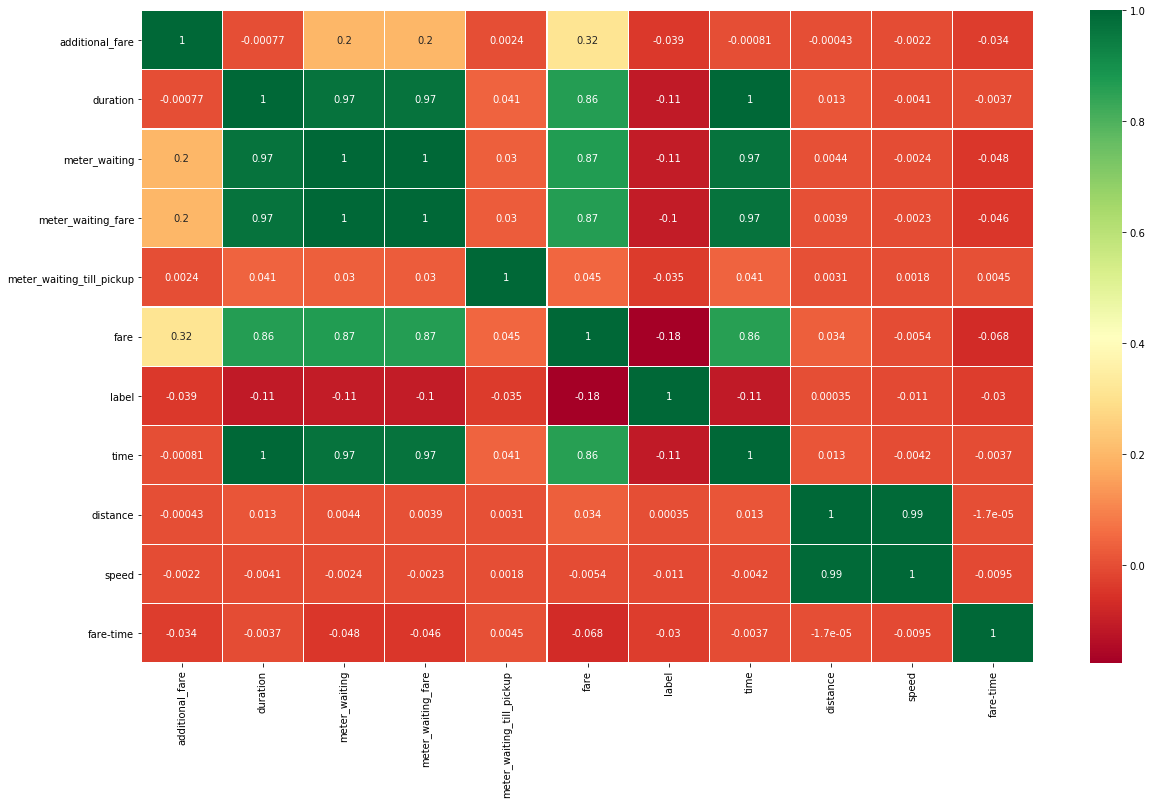

In [73]:
sns.heatmap(train_csv.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [74]:
# def throttling(arr, thres):
#     #res = arr.copy()
#     res = np.zeros(len(arr))
#     res[arr >= thres] = int(1)
#     res[arr < thres] = int(0)
#     return res

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(train_csv.drop('label', axis=1),
                                                 train_csv['label'],
                                                 test_size=0.33,
                                                 random_state=123)


In [77]:
from xgboost import XGBClassifier

In [78]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
# lr = LogisticRegression()
# lr.fit(x_train,y_train)
# y_pred_lr = lr.predict(x_test)

xgb = XGBClassifier(objective='reg:linear',learning_rate=0.05, n_estimators=70, max_depth=6)
xgb.fit(x_train, y_train)

[16:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [80]:
y_pred_xgb = xgb.predict(x_test)

In [81]:
from sklearn.metrics import f1_score
# print(f1_score(test_labels,preds,average="macro"))
print(f1_score(y_test,y_pred_xgb,average="macro"))

0.8567167951472261


In [82]:
print('The accuracy of the XGB  is',round(accuracy_score(y_pred_xgb,y_test)*100,2))

The accuracy of the XGB  is 95.54


In [83]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred_xgb))

0.975609756097561


In [84]:
final_csv.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare'],
      dtype='object')

In [85]:
find_time(final_csv)

In [259]:
final_csv.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
time                         0
dtype: int64

In [260]:
find_distance(final_csv)

In [261]:
find_duration(final_csv)

In [262]:
final_csv.drop(['pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'],axis=1,inplace=True)


In [263]:
# waiting(final_csv)

In [264]:
orginal_csv=final_csv.copy()
final_csv.drop(['tripid'],axis=1,inplace=True)
final_csv.head(n=5)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,time,distance,speed,fare-time
0,10.5,924,42,2.4486,148,289.27,900.0,6.707807,0.007453,3.049055
1,10.5,4249,20,0.0000,91,1912.70,4260.0,41.571559,0.009759,2.211011
2,10.5,1552,255,2.6588,23,394.00,1560.0,5.918535,0.003794,3.291878
3,10.5,462,16,0.0000,198,154.32,480.0,3.302798,0.006881,2.890098
4,10.5,814,392,12.3692,69,147.47,840.0,2.589354,0.003083,2.861599


In [265]:
y_final_prob = xgb.predict(final_csv)


In [266]:
print(y_final_prob)

[1 1 1 ... 1 1 1]


In [267]:
submission = pd.concat([orginal_csv['tripid'], pd.DataFrame(y_final_prob)], axis=1)
submission.columns = ['tripid', 'prediction']

In [268]:
submission.to_csv('submission.csv', encoding='utf-8', index = False)